In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("sarcasm.json")
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [3]:
y = data["is_sarcastic"]

In [4]:
sentence = data.headline
sentence

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_documents = vectorizer.fit_transform(sentence)

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [7]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [8]:
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_
print(results.sample(50))

                                                document  cluster
15234  pizza hut's new pizza lover's pizza topped wit...        0
6149   elizabeth warren slams pat toomey for trying t...        0
25921  20th century fox, paramount have no female dir...        0
9049   cobweb-covered skeleton gripping senate desk e...        0
21492   kentucky clerk kim davis appeals contempt ruling        0
19387  'hunger games' star jena malone shares pregnan...        0
25183                     toll-booth girl hit on quickly        0
20839                      lessons from my gratitude jar        0
10510  mike pompeo's anti-gay views should disqualify...        0
26534  wendy's new homestyle chicken strips salad sha...        0
14546  swiss avalanche kills thousands; world stays n...        0
8973   here's how bendy your body actually gets durin...        0
608    area man going to go ahead and consider that a...        0
8861        7 things that always go on sale in september        0
5875    go

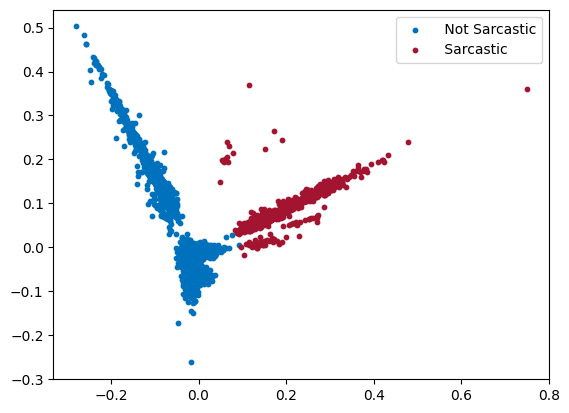

In [32]:
bl = [0, 0.4470, 0.7410]
rd = [0.6350, 0.0780, 0.1840]
b = [0.3010, 0.7450, 0.9330]
g = [0, 0.75, 0.75]
colors = [bl, rd,'red','black']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [10]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


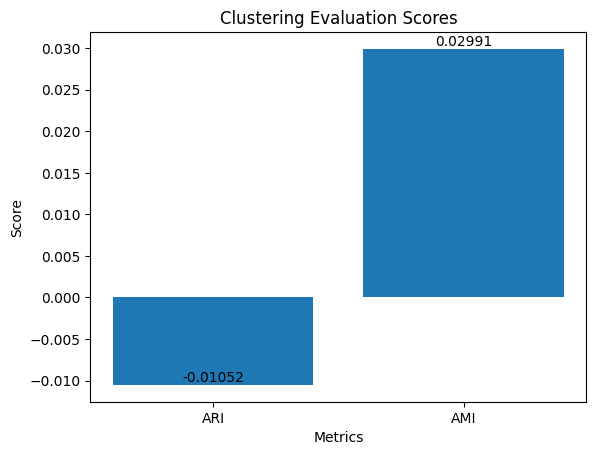

In [20]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
ari = adjusted_rand_score(y, kmeans.labels_)
ami = adjusted_mutual_info_score(y, kmeans.labels_)


# Plot the bar plot with values in the center
scores = [ari, ami]
labels = ['ARI', 'AMI']

plt.bar(labels, scores)
plt.title('Clustering Evaluation Scores')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add the values to the center of each bar
for i, score in enumerate(scores):
    plt.text(i, score, str(round(score, 5)), ha='center', va='bottom')

plt.show()


In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ma = "center")

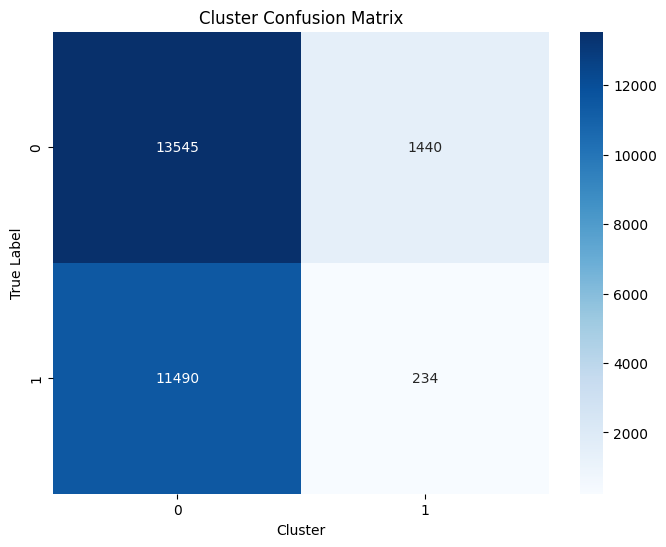

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, kmeans.labels_)

# Plot the cluster heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster Confusion Matrix")
plt.xlabel("Cluster")
plt.ylabel("True Label")
plt.show()